In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("student_performance_150.csv")

# Display first 5 rows
print("Dataset Preview:")
df.head()


Dataset Preview:


,Student_ID,Name,Gender,Attendance (%),Math,Science,English,History,Total,Grade
0,1001,Student_1001,M,84,100,69,94,63,326,B
1,1002,Student_1002,F,84,81,81,46,35,243,C
2,1003,Student_1003,M,82,62,45,100,82,289,C
3,1004,Student_1004,M,54,69,42,74,95,280,C
4,1005,Student_1005,M,91,68,59,33,72,232,D


In [2]:
# Check basic information
print("Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nSummary Statistics:")
print(df.describe())

# Verify unique grades
print("\nUnique Grades:", df['Grade'].unique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      150 non-null    int64 
 1   Name            150 non-null    object
 2   Gender          150 non-null    object
 3   Attendance (%)  150 non-null    int64 
 4   Math            150 non-null    int64 
 5   Science         150 non-null    int64 
 6   English         150 non-null    int64 
 7   History         150 non-null    int64 
 8   Total           150 non-null    int64 
 9   Grade           150 non-null    object
dtypes: int64(7), object(3)
memory usage: 11.8+ KB

Missing Values:
Student_ID        0
Name              0
Gender            0
Attendance (%)    0
Math              0
Science           0
English           0
History           0
Total             0
Grade             0
dtype: int64

Summary Statistics:
        Student_ID  Attendance (%)        Math     

In [3]:
# Recalculate Total Marks (optional)
df['Total_Calc'] = df[['Math', 'Science', 'English', 'History']].sum(axis=1)

# Check if total matches the dataset's Total column
df['Total_Match'] = df['Total'] == df['Total_Calc']
print("Rows where Total mismatched:", df[~df['Total_Match']].shape[0])

# Drop helper columns after verification
df.drop(['Total_Calc', 'Total_Match'], axis=1, inplace=True)


Rows where Total mismatched: 0


/tmp/ipython-input-2246936692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=df, palette='viridis')


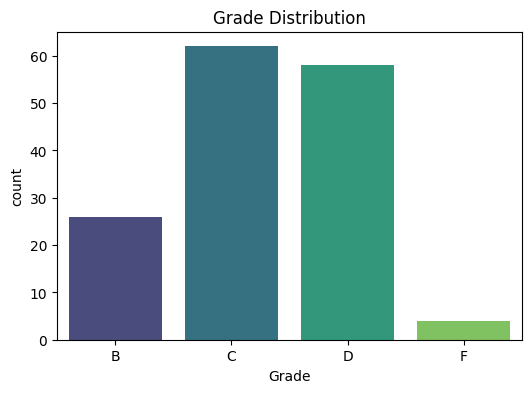

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Grade', data=df, palette='viridis')
plt.title("Grade Distribution")
plt.show()


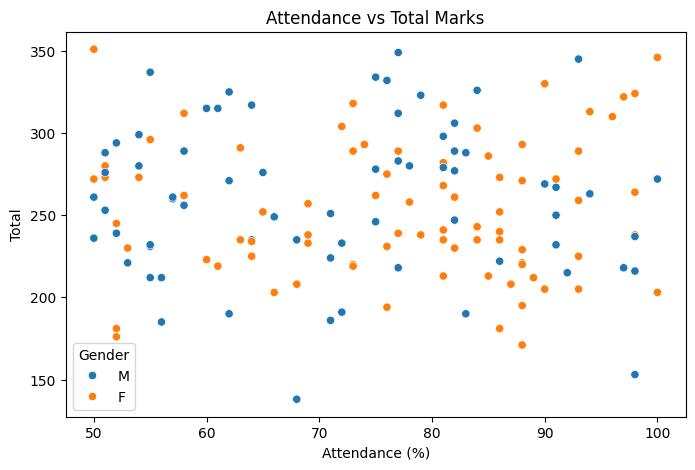

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Attendance (%)', y='Total', hue='Gender', data=df)
plt.title("Attendance vs Total Marks")
plt.show()


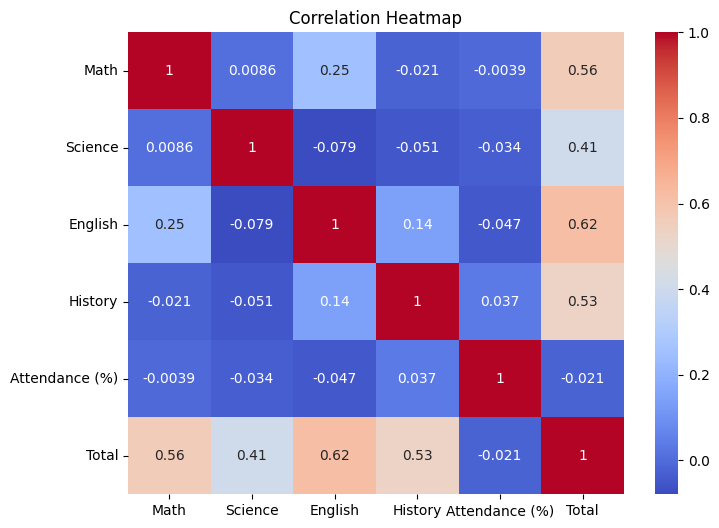

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Math','Science','English','History','Attendance (%)','Total']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


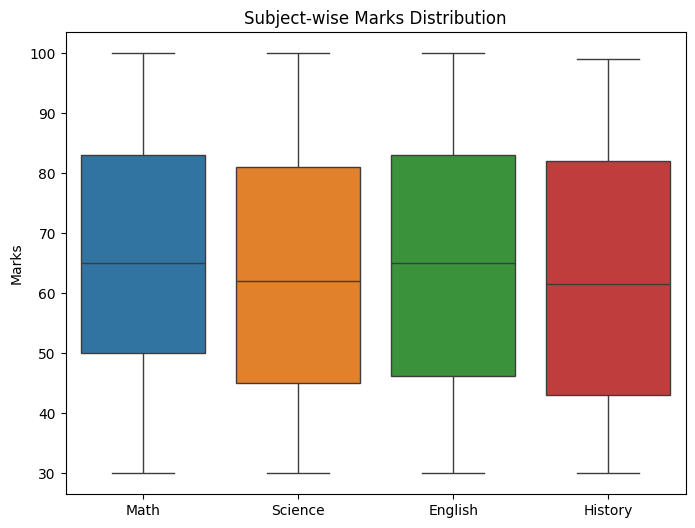

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Math','Science','English','History']])
plt.title("Subject-wise Marks Distribution")
plt.ylabel("Marks")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ✅ Use only numeric columns for training
X = df[['Math', 'Science', 'English', 'History']]  # features
y = df['Grade']                                   # target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------------
# Prediction Function
# -------------------------------
def predict_student_performance(math, science, english, history):
    total = math + science + english + history
    grade = model.predict([[math, science, english, history]])[0]

    # Performance Level based on total marks
    if total >= 360:
        perf = "Excellent"
    elif total >= 300:
        perf = "Good"
    elif total >= 240:
        perf = "Average"
    elif total >= 180:
        perf = "Below Average"
    else:
        perf = "Poor"

    return grade, perf

# Example new student prediction
new_student = [85, 78, 90, 88]
predicted_grade, predicted_performance = predict_student_performance(*new_student)

print("\n🔹 Predicted Grade:", predicted_grade)
print("🔹 Predicted Performance:", predicted_performance)


✅ Model Accuracy: 0.5333333333333333

Classification Report:
               precision    recall  f1-score   support

           B       0.33      0.50      0.40         2
           C       0.53      0.75      0.62        12
           D       0.67      0.43      0.52        14
           F       0.00      0.00      0.00         2

    accuracy                           0.53        30
   macro avg       0.38      0.42      0.39        30
weighted avg       0.55      0.53      0.52        30


🔹 Predicted Grade: B
🔹 Predicted Performance: Good


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
